In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
customers.sample(3)

,CustomerID,CustomerName,Region,SignupDate
184,C0185,Kathleen Logan,North America,2023-10-17
135,C0136,Kristen Holder,Asia,2024-03-14
171,C0172,Jamie Webb,Europe,2024-09-09


In [6]:
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [8]:
products.sample(3)

,ProductID,ProductName,Category,Price
1,P002,ActiveWear Smartwatch,Electronics,346.30
60,P061,HomeSense Desk Lamp,Home Decor,156.96
73,P074,SoundWave Desk Lamp,Home Decor,295.58


In [9]:
products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [10]:
transactions.sample(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
210,T00023,C0012,P061,2024-06-18 10:55:39,4,627.84,156.96
123,T00261,C0125,P041,2024-02-20 06:00:07,2,912.56,456.28
227,T00100,C0197,P084,2024-05-08 15:48:20,3,1013.73,337.91


In [11]:
transactions['TransactionID'].nunique()

1000

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [13]:
merged_data = transactions.merge(customers, on="CustomerID", how="left")

merged_data = merged_data.merge(products, on="ProductID", how="left")

In [14]:
merged_data.sample(4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
695,T00552,C0096,P064,2024-12-11 17:46:24,4,1809.68,452.42,Benjamin Mcclure,South America,2022-11-18,HomeSense Running Shoes,Clothing,452.42
749,T00804,C0134,P035,2024-12-10 06:40:49,4,122.36,30.59,Theresa Gonzalez,Asia,2022-02-19,ActiveWear T-Shirt,Clothing,30.59
854,T00170,C0038,P082,2024-02-29 01:45:41,3,167.97,55.99,Jeffrey Perkins,North America,2022-04-16,ComfortLiving Rug,Home Decor,55.99
192,T00323,C0082,P038,2024-09-22 07:51:55,4,588.88,147.22,Aimee Taylor,South America,2022-05-13,TechPro Vase,Home Decor,147.22


In [15]:
merged_data['TransactionID'].nunique()

1000

In [16]:
merged_data = merged_data.drop(columns=['Price_x'])

In [17]:
merged_data.rename(columns ={"Price_y" : "Price"} , inplace=True)

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   CustomerName     1000 non-null   object 
 7   Region           1000 non-null   object 
 8   SignupDate       1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [19]:
df = merged_data.copy()

In [20]:
df.sample(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
521,T00677,C0100,P009,2024-03-05 23:39:40,4,1300.04,Clinton Gomez,Europe,2023-03-16,BookWorld Wall Art,Home Decor,325.01
668,T00661,C0049,P073,2024-05-25 20:16:42,2,53.98,Jason Yates,North America,2024-09-18,ComfortLiving Laptop,Electronics,26.99
541,T00848,C0108,P011,2024-09-25 01:50:13,2,522.40,David Davis,South America,2022-09-28,SoundWave Desk Lamp,Home Decor,261.20


In [21]:
df.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price              0
dtype: int64

In [22]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["SignupDate"] = pd.to_datetime(df["SignupDate"])


# EDA

In [23]:
#Which products are the most popular and should be prioritized for inventory and marketing?

In [24]:
top_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print(top_products)


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [25]:
# Revenue Contribution by customers

In [26]:
top_customer = df.groupby("CustomerID")['TotalValue'].sum().sort_values(ascending=False)
top_customer.head(5)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64

In [27]:
top_10_percent_customers = top_customer[top_customer > top_customer.quantile(0.90)]

top_10_percent_customers

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
C0068     5950.42
Name: TotalValue, dtype: float64

In [28]:
contribution_of_top_10_percent = (top_10_percent_customers.sum() / df["TotalValue"].sum()) * 100

In [29]:
contribution_of_top_10_percent

19.96819225909222

In [30]:
top_20_percent_customers = top_customer[top_customer > top_customer.quantile(0.80)]

top_20_percent_customers

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
C0068     5950.42
C0075     5848.97
C0173     5808.04
C0114     5780.43
C0163     5775.28
C0145     5771.27
C0051     5699.57
C0046     5627.83
C0138     5610.25
C0101     5550.99
C0109     5487.25
C0148     5457.79
C0021     5419.92
C0155     5377.83
C0004     5354.88
C0053     5316.46
C0093     5294.99
C0012     5231.26
C0023     5158.65
C0171     5145.35
C0122     5072.55
Name: TotalValue, dtype: float64

In [31]:
contribution_of_top_20_percent = (top_20_percent_customers.sum() / df["TotalValue"].sum()) * 100

In [32]:
contribution_of_top_20_percent

35.879825081772985

In [33]:
# contribution of top 10% customers is nearly 20% of total revenue
# contribution of top 20% customers is nearly 35% of total revenue

In [34]:
category_revenue = df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print(category_revenue)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [35]:
# Books contribute the most revenue ($192,147.47), followed by Electronics ($180,783.50).

In [36]:
# High-Value Customers:

In [37]:
customer_purchases = df["CustomerID"].value_counts().head(10)
print(customer_purchases)


CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


In [38]:
repeat_customers = df["CustomerID"].value_counts()
#more than 2 purchases
repeat_rate = ((repeat_customers[repeat_customers > 2].count()) / repeat_customers.count()) * 100

repeat_rate

89.44723618090453

In [48]:
# After the singup of customer there are nearly 90% chances that cunstomer can perform at 2 transcations
# Customer retention is high

In [ ]:
# Seasonal Trends in Sales

In [40]:
df["Month"] = df["TransactionDate"].dt.month
df["Quarter"] = df["TransactionDate"].dt.to_period("Q")

quarterly_sales = df.groupby("Quarter")["TotalValue"].sum()

quarterly_sales

Quarter
2023Q4      3769.52
2024Q1    165664.39
2024Q2    170817.98
2024Q3    205406.88
2024Q4    144336.79
Freq: Q-DEC, Name: TotalValue, dtype: float64

In [41]:
Monthly_sales = df.groupby("Month")["TotalValue"].sum()

Monthly_sales

Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64

In [42]:
# Quarter 3 give highest sales
# There is drop in sale during month October and november.

In [43]:
regional_sales = df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(regional_sales)


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [44]:
df["SignupMonth"] = df["SignupDate"].dt.to_period("M")
signup_trends = df["SignupMonth"].value_counts().sort_index()
print(signup_trends)


SignupMonth
2022-01     6
2022-02    34
2022-03    46
2022-04    42
2022-05    57
2022-06    24
2022-07    15
2022-08    13
2022-09    30
2022-10    22
2022-11    14
2022-12    29
2023-01    30
2023-02    30
2023-03    34
2023-04    32
2023-05    16
2023-06    16
2023-07    12
2023-08    14
2023-09    23
2023-10    27
2023-11    19
2023-12    28
2024-01    43
2024-02    35
2024-03    20
2024-04    48
2024-05    34
2024-06    14
2024-07    36
2024-08    20
2024-09    58
2024-10    31
2024-11    43
2024-12     5
Freq: M, Name: count, dtype: int64


In [ ]:
# Category-Wise Profitability

In [45]:

category_revenue = df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)


category_avg_price = df.groupby("Category")["Price"].mean().sort_values(ascending=False)

category_revenue, category_avg_price


(Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 Category
 Electronics    288.722008
 Clothing       283.104254
 Books          280.526222
 Home Decor     237.616250
 Name: Price, dtype: float64)

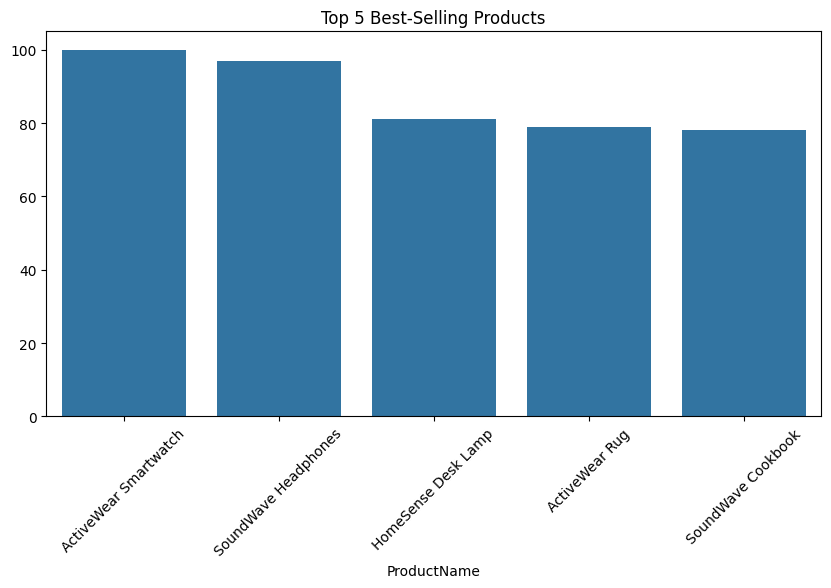

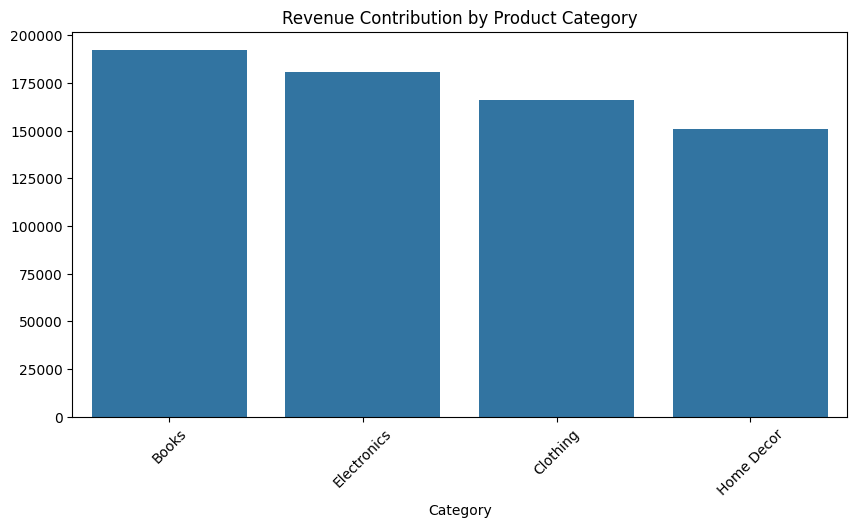

In [46]:


plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Best-Selling Products")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue Contribution by Product Category")
plt.xticks(rotation=45)
plt.show()


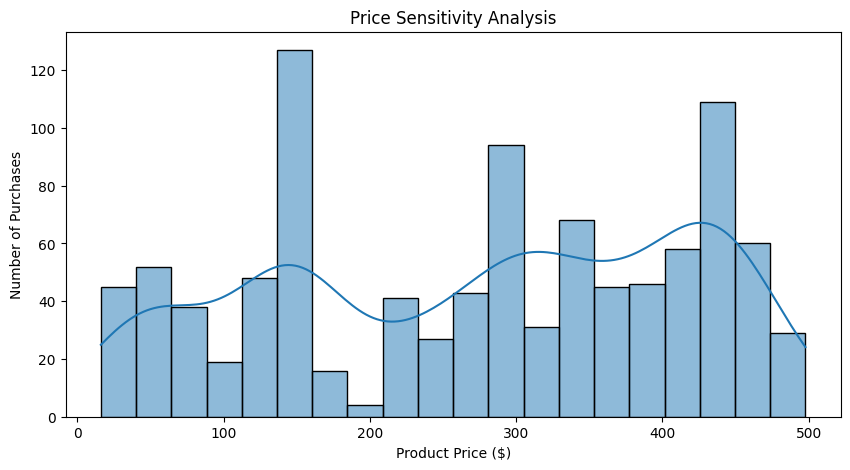

In [47]:

plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=20, kde=True)
plt.title("Price Sensitivity Analysis")
plt.xlabel("Product Price ($)")
plt.ylabel("Number of Purchases")
plt.show()


In [ ]:
#The majority of purchases fall within the $100-$300 range, suggesting price sensitivity.
#Discounting premium products (above $400) can increase sales in this segment.